In [1]:
import numpy as np
import math
import sys
import time

import numpy.random
from docplex.mp.model import Model
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#real case setting
N = 792
M = 5 #team
T = 30
#L=30000
Budget = 4000
cost = 0.375 #/lane/m
Lm = Budget/cost
Ld = 120
 # bigM
Dm = 10 #maximum repair time spanning
n = [i for i in range(1,N)]
m = [i for i in range(0,M)]
t = [i for i in range(0,T)]

w = [-1.0 for i in range (0,N)]
l = [1000 for i in range (0,N)]
data = pd.read_csv(f'./Wdens202001.csv')
for j, row in data.iterrows():
    w[row['id_road']] = row['weighteddensity']
    l[row['id_road']] = row['length']/4
bigM=Ld*T    

In [3]:
#toy problem
#N = 10
#M = 2
#T = 3
#Budget = 200
#cost = 0.375
#Lm = Budget/cost
#Ld = 120 
#Dm = 5
#n = [i for i in range(1,N)]
#m = [i for i in range(0,M)]
#t = [i for i in range(0,T)]
#w = [-1.0 for i in range (0,N)]
#l = [1000 for i in range (0,N)]
#w[0]=20; w[1]=30; w[2]=40; w[3]=50; w[4]=60; w[5]=70; w[6]=80; w[7]=110; w[8]=130; w[9]=160
#l[0]=30; l[1]=40; l[2]=50; l[3]=60; l[4]=70; l[5]=80; l[6]=90; l[7]=100; l[8]=110; l[9]=120
#bigM = Ld*T

In [4]:
bigM, Lm

(3600, 10666.666666666666)

In [5]:
mdl = Model('repair_pothole')
x = mdl.continuous_var_dict([(i,j,k) for i in n for j in m for k in t], name='x')
y = mdl.binary_var_dict([(i) for i in n ], name='y')
e = mdl.binary_var_dict([(i,j) for i in n for j in m], name='e')
z = mdl.binary_var_dict([(i,k) for i in n for k in t], name='z')
a = mdl.binary_var_dict([(i,k) for i in n for k in t], name='a')

mdl.maximize(mdl.sum(w[i]*y[i] for i in n) -mdl.sum(z[i,k] for i in n for k in t))
mdl.add_constraint(mdl.sum(l[i]*y[i] for i in n) <= Lm )
mdl.add_constraints(mdl.sum(x[i,j,k] for j in m for k in t) - l[i]*y[i] == 0 for i in n)
mdl.add_constraints(mdl.sum(x[i,j,k] for i in n) <= Ld for j in m for k in t)
#mdl.add_constraints(mdl.sum(x[i,j,k] for j in m) <=1 for i in n for k in t)
mdl.add_constraints(e[i,j] - mdl.sum(x[i,j,k] for k in t) <= 0 for i in n for j in m)
mdl.add_constraints(mdl.sum(x[i,j,k] for k in t) - e[i,j]*bigM <=0 for i in n for j in m)
mdl.add_constraints(mdl.sum(e[i,j] for j in m) -y[i] == 0 for i in n)
mdl.add_constraints(z[i,k] - mdl.sum(x[i,j,k] for j in m) <= 0 for i in n for k in t)
mdl.add_constraints(mdl.sum(x[i,j,k] for j in m) - z[i,k]*bigM <=0 for i in n for k in t)
mdl.add_constraints(mdl.sum(z[i,k] for k in t) <= Dm for i in n)
mdl.add_constraints(a[i,k]-z[i,k]+z[i,k-1] >=0 for i in n for k in range(1,T))
mdl.add_constraints(mdl.sum(a[i,k] for k in t) -y[i] ==0 for i in n)
mdl.add_constraints(z[i,0] == 0 for i in n)
mdl.parameters.mip.tolerances.mipgap.set(0.1)

0.1

In [6]:
mdl.export_as_lp("repairing_problem")
solution = mdl.solve(log_output=True)

CPXPARAM_Read_DataCheck                          1
CPXPARAM_MIP_Tolerances_MIPGap                   0.10000000000000001
Found incumbent of value 0.000000 after 0.00 sec. (4.75 ticks)
Tried aggregator 2 times.
MIP Presolve eliminated 2378 rows and 5537 columns.
MIP Presolve modified 42377 coefficients.
Aggregator did 797 substitutions.
Reduced MIP has 79240 rows, 164522 columns, and 861411 nonzeros.
Reduced MIP has 49827 binaries, 0 generals, 0 SOSs, and 0 indicators.
Presolve time = 0.59 sec. (565.84 ticks)
Probing fixed 241 vars, tightened 0 bounds.
Probing time = 0.94 sec. (112.89 ticks)
Tried aggregator 1 time.
MIP Presolve eliminated 0 rows and 241 columns.
Reduced MIP has 79240 rows, 164281 columns, and 860929 nonzeros.
Reduced MIP has 49586 binaries, 0 generals, 0 SOSs, and 0 indicators.
Presolve time = 4.81 sec. (2309.64 ticks)
Probing time = 0.11 sec. (43.87 ticks)
Clique table members: 316464.
MIP emphasis: balance optimality and feasibility.
MIP search method: dynamic search.

In [7]:
print(solution)

solution for: repair_pothole
objective: 4745.52
x_24_3_17=92.030
x_27_2_5=96.250
x_36_4_20=7.750
x_36_4_21=32.751
x_51_3_29=65.139
x_59_0_1=17.685
x_68_1_28=65.916
x_84_2_1=70.769
x_109_1_16=69.875
x_117_2_17=49.416
x_117_2_18=15.784
x_125_4_11=65.511
x_134_1_6=65.595
x_139_2_6=65.370
x_144_3_10=53.788
x_144_3_11=11.693
x_151_1_27=65.689
x_157_4_2=54.090
x_161_1_23=65.724
x_168_1_4=65.926
x_174_4_21=20.823
x_174_4_22=52.007
x_176_2_24=65.242
x_178_2_25=65.401
x_185_4_16=67.531
x_195_0_26=64.064
x_201_3_21=110.194
x_203_1_25=16.910
x_203_1_26=49.844
x_206_0_13=64.555
x_208_1_10=68.253
x_213_0_4=53.677
x_213_0_5=14.946
x_218_0_7=65.434
x_218_3_8=0.000
x_218_3_9=0.000
x_218_3_10=-0.000
x_218_3_11=-0.000
x_219_2_20=68.916
x_224_0_10=65.112
x_230_0_11=75.588
x_235_3_19=71.134
x_240_1_18=72.703
x_247_3_15=112.250
x_253_4_28=77.455
x_261_1_12=70.168
x_267_2_15=71.088
x_275_2_4=41.113
x_275_2_5=23.750
x_275_4_5=-0.000
x_282_2_13=72.790
x_290_1_19=12.374
x_290_1_20=53.626
x_309_3_9=65.314
x_313

In [8]:
x1 = [[[0.0 for k in t] for j in m] for i in range(0,N)]
y1 = [0 for i in range(0,N)]
e1 = [[-1 for j in m] for i in range(0,N)]
z1 = [[0 for k in t] for i in range(0,N)]
fixroad = []

In [9]:
for i in n:
    y1[i] = y[i].solution_value
    if y1[i] >=0.9:
        fixroad.append(i)
    for j in m:
        e1[i][j] = e[i,j].solution_value
        for k in t:
            x1[i][j][k] = x[i,j,k].solution_value
#fixroad            

In [10]:
Bcost = 0
for i in n:
    for j in m:
        for k in t:
            if x1[i][j][k] >0:
                #print(x[i][j][k])
                Bcost = Bcost + cost*x1[i][j][k]     
Bcost                

3931.4729062511265

In [11]:
road_map = pd.read_csv(f'C:\\users\\xiaohang\\documents\\roadSimple.csv')
pothole = road_map[['id_road']].copy()
pothole['repaired'] = 0.0
pothole = pothole.dropna(subset=['id_road'])
pothole['id_road'] = pothole['id_road'].astype(np.int64)
for item in fixroad:
    pothole.loc[pothole['id_road'] == item, "repaired"] = 1.0
pothole.to_csv(r'D:\pothole\repplan202201_B' + str(Budget)+'Crew_'+str(M) + '.csv')

In [12]:
for i in n:
    for k in t:
        z1[i][k] = z[i,k].solution_value 
        

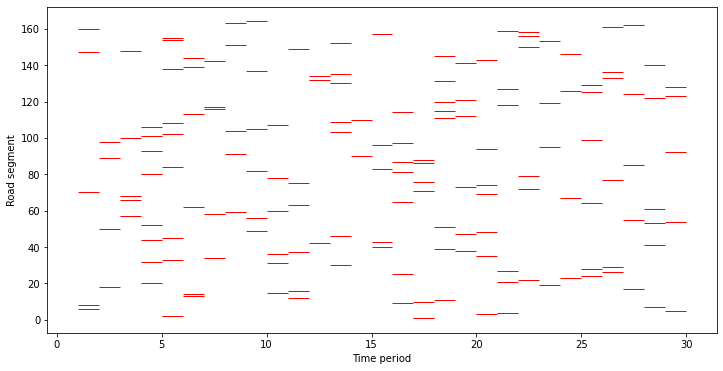

165


In [13]:

fig, ax = plt.subplots(figsize=(12, 6))
x = np.arange(0, 30, 1)
#ax.set_ylim([0, 250])
num=1
for i in n:
    for k in t:
        if z1[i][k] >0.9:
            ax.hlines(y=num, xmin=k, xmax=k+1, linewidth=1, colors='r')
            num = num +1     
       
plt.ylabel('Road segment')
plt.xlabel('Time period')
plt.show()
print(num)

0
1
2
3
4


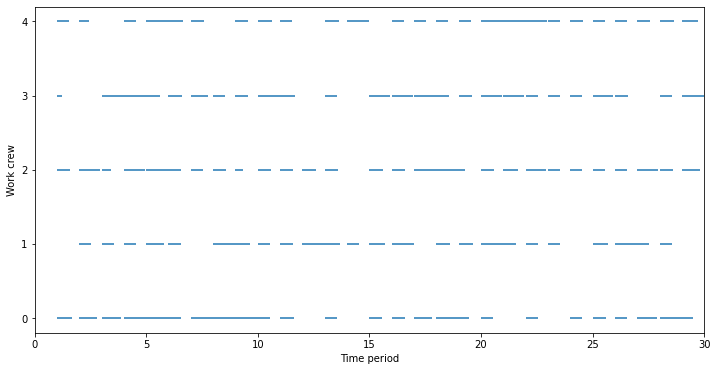

In [22]:
fig1, ax1 = plt.subplots(figsize=(12, 6))
ax1.set_xlim([0, 30])
for j in m:
    print(j)
    for k in t:
        start = 0
        for i in n:
            if x1[i][j][k] >=1.0:
                ax1.hlines(y=j, xmin=k+start, xmax=k+start+(x1[i][j][k]/120) )
                start = start + (x1[i][j][k]/120)
plt.yticks(np.arange(0,5,1))
#ax1.xaxis.set_ticklabels(np.arange(30, 1, 1))
plt.xlabel('Time period')
plt.ylabel('Work crew')
plt.show()